## Config

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
import pandas as pd
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr, spearmanr
from UQ import get_UQ
from metrics import *

# Data loading

In [46]:
freesolv_path = '/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/'
delaney_path = '/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/delaney/rdkit_subtraction_bilinear_hsize1024_hnum3_esize64_bsize256'
lipo_path = '/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/lipo/rdkit_subtraction_bilinear_hsize256_hnum3_esize32_bsize256'

In [113]:
for end in os.listdir(freesolv_path):
    if end != 'old':
        folder = os.path.join(freesolv_path, end)
        get_UQ(folder)

removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/group_df
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/all_eval.pkl
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/group_df.pkl
removed existing group df!
removed existing eval df!
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/250/group_df
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/250/all_eval.pkl
removed /Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/250/group_df.pkl
removed existing group df!
removed existing eval df!
removed /Users/el

In [115]:
base_path = freesolv_path
exp_folders = [os.path.join(base_path, end) for end in os.listdir(base_path)]
group_name = 'group_df.pkl'
all_name = 'all_eval.pkl'
data_name = 'data.pkl'
dfs = {
    folder[folder.rindex('/')+1:] : pd.read_pickle(osp.join(folder, group_name) )
    for folder in exp_folders if osp.exists(osp.join(folder, group_name))
}
all_dfs = {
    folder[folder.rindex('/')+1:] : pd.read_pickle(osp.join(folder, all_name) )
    for folder in exp_folders if osp.exists(osp.join(folder, all_name))
}
data_dfs = {
    folder[folder.rindex('/')+1:] : pd.read_pickle(osp.join(folder, data_name) )
    for folder in exp_folders if osp.exists(osp.join(folder, data_name))
}

# Metric calculation

In [127]:
metrics = [
    spearman,
    MAE, 
    MSE, 
    r2,
    r,
    nll,
]
metric_df = pd.DataFrame({f() : [] for f in metrics})
metric_df['split'] = []

In [128]:
for name, df in dfs.items():
    next_df = pd.DataFrame(
        {f() : [f(df)] for f in metrics}, 
        index = [name],
    )
    next_df['split'] = len(data_dfs[name]['train_formula']) / (
        len(data_dfs[name]['train_formula']) + len(data_dfs[name]['eval_formula']) + len(data_dfs[name]['ood_formula'])
    )
    metric_df = pd.concat([metric_df, next_df])
metric_df['r2'] = metric_df['r']**2
metric_df

,spearman,MAE,MSE,R2,r,NLL,split,r2
05,0.267026,0.921326,33.948512,-34.720561,0.023287,49.310382,0.051402,0.000542
250,0.518145,0.228285,0.240105,0.780107,0.910198,5.082878,0.500000,0.828460
20,0.591673,0.473577,5.202694,-3.582584,0.313861,6.508885,0.200935,0.098509
10,0.342753,0.385742,0.806339,0.172667,0.583547,10.382574,0.101246,0.340527
340,0.619736,0.230254,0.223230,0.797075,0.929810,3.514485,0.400312,0.864546
r1,0.576350,0.180061,0.150130,0.858163,0.943112,1.429608,0.500000,0.889460


In [108]:
for row in metric_df:
    print(row)

spearman
MAE
MSE
R2
r
datapoints
r2


In [ ]:
metric_df.plot.scatter(x = 'datapoints', y= 'r2')


<Axes: xlabel='datapoints', ylabel='r2'>

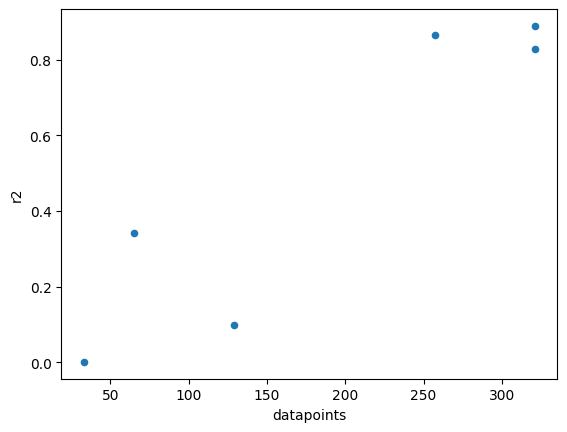

In [122]:
metric_df.plot.scatter(x = 'datapoints', y= 'r2')


<Axes: xlabel='spearman', ylabel='r2'>

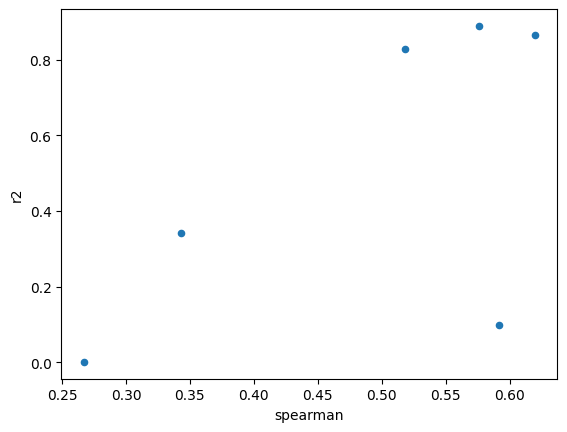

In [107]:
metric_df.plot.scatter(x = 'spearman', y= 'r2')
for row in metric_df:
    

# Individual Analysis

In [84]:
subfolder = '05'
df = dfs[subfolder]
all_df = all_dfs[subfolder]

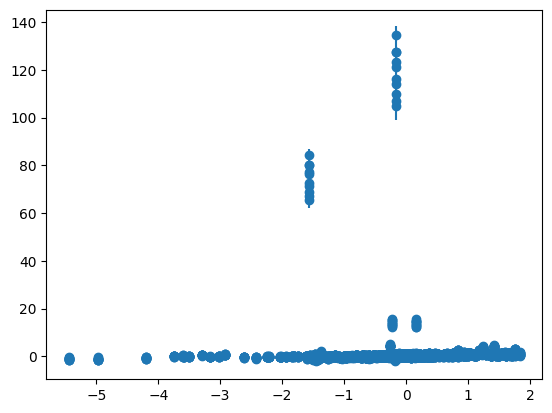

In [85]:
x = df['gt']
y = df['preds']
error = df['pred_std']
plt.errorbar(x, y, yerr = 2*error, fmt = 'none')
plt.scatter(all_df['gt'], all_df['preds'])
# plt.ylim((-2, 5))
# plt.plot([-2,2], [-2, 2])

In [74]:
df.sort_values('pred_std')

,preds,gt,anchor_idxs,train_analogy_pair_idx,error,abs_error,sq_error,pred_std,total_abs_error
formula,,,,,,,,,
CCC(=O)OC,0.226106,0.231056,21.3,"[21.3, 9.0]",-0.004950,0.006038,0.000072,0.000052,0.004950
CCCCCCC(=O)C,0.343472,0.243650,9.0,"[7.0, 29.0]",0.099822,0.099822,0.010021,0.000063,0.099822
CCCCCCCCC=O,0.346553,0.447681,15.2,"[15.2, 29.0]",-0.101127,0.101127,0.010391,0.000182,0.101127
CCSC,0.609346,0.591258,11.0,"[29.0, 12.0]",0.018088,0.020675,0.000533,0.000228,0.018088
Cc1ccc(cc1)C,0.776915,0.767580,3.4,"[3.4, 16.0]",0.009334,0.013762,0.000313,0.000251,0.009334
...,...,...,...,...,...,...,...,...,...
c1cc(cc(c1)O)[N+](=O)[O-],-1.113955,-1.454085,15.8,"[16.5, 19.7]",0.340130,0.475047,0.582457,0.518632,0.340130
CN(C)C,13.771841,0.163046,0.0,"[22.0, 1.2]",13.608796,13.608796,186.312296,1.236619,13.608796
CC(C)O,14.023399,-0.224864,0.0,"[22.0, 1.2]",14.248264,14.248264,204.178804,1.295310,14.248264


In [87]:
all_df.query('formula == "CC(C)(C)O"')['train_analogy_pair_idx']

/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/25-07-25_17-38-56  223    [22, 4]
/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/25-07-25_17-34-25  223    [22, 4]
/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/25-07-25_17-37-02  223    [22, 0]
/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/25-07-25_17-29-45  223    [22, 0]
/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/25-07-25_17-35-23  223    [22, 0]
/Users/elimeyers/matexes/matex_ensemble/blt/log/molnet/freesolv/rdkit_subtraction_bilinear_hsize256_hnum4_esize64_bsize256/05/25-07-25_17-26-14  223    [22, 0]
/Users/elimeyers/matexes/matex_ensemble/